In [1]:
import pandas as pd
import numpy as np
from perceptron import PocketPerceptron
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
blobs = pd.read_csv('../data/blobs2.csv')
blobs.loc[blobs.label == 0, 'label'] = -1

# 2

In [4]:
perceptron = PocketPerceptron(max_iterations=50, early_stop=True)

In [5]:
x, y = blobs[['x', 'y']].values, blobs.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
perceptron.fit(x_train, y_train)

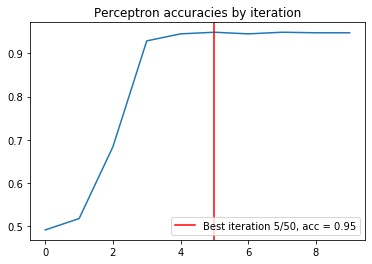

In [7]:
plt.title('Perceptron accuracies by iteration')
plt.plot(perceptron.accuracies)
best = np.argmax(perceptron.accuracies)
plt.axvline(best, c='red', label=f'Best iteration {best}/{perceptron.max_iterations}, acc = {max(perceptron.accuracies):.2f}')
plt.legend()

In [8]:
y_pred = perceptron.predict(x_test)

In [11]:
print(f'Test accuracy = {sum(y_pred == y_test) / len(y_test)}')

Test accuracy = 0.98


In [12]:
def y_2d(x, w0, w1, w2):
    return (-w1*x - w0) / w2

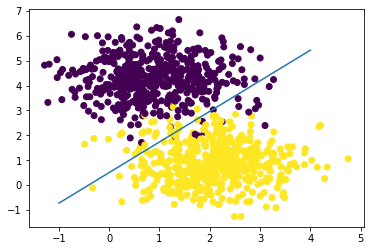

In [13]:
plt.scatter(blobs.x, blobs.y, c=blobs.label)
plt.plot([-1, 4], [y_2d(-1, *perceptron.weights), y_2d(4, *perceptron.weights)])

# 3

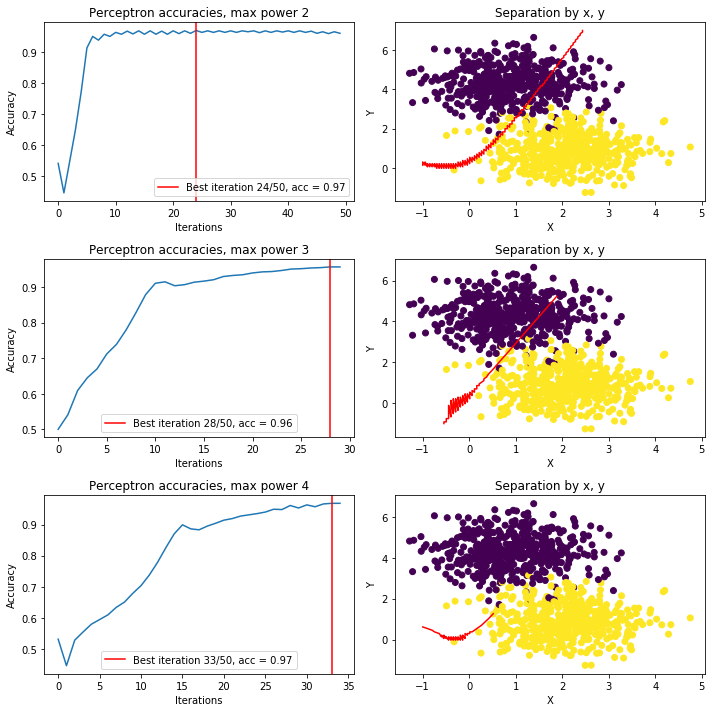

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
blobs = pd.read_csv('../data/blobs2.csv')
blobs.loc[blobs.label == 0, 'label'] = -1

for i, power in enumerate(range(2, 5)):
#     blobs[f'x_{power}'], blobs[f'y_{power}'] = blobs.x**power, blobs.y**power
    for k in range(power + 1):
        blobs[f'x_{power - k}_y_{k}'] = blobs.x**(power - 1) * blobs.y**k
    perceptron = PocketPerceptron(max_iterations=50, early_stop=True)
    perceptron.fit(blobs.drop(['label'], axis=1).values, blobs.label.values)
    
    ax[i, 0].set_title(f'Perceptron accuracies, max power {power}')
    ax[i, 0].set_xlabel('Iterations')
    ax[i, 0].set_ylabel('Accuracy')
    ax[i, 0].plot(perceptron.accuracies)
    best = np.argmax(perceptron.accuracies)
    ax[i, 0].axvline(best, c='red', 
                     label=f'Best iteration {best}/{perceptron.max_iterations}, acc = {max(perceptron.accuracies):.2f}')
    ax[i, 0].legend()
    ax[i, 1].scatter(blobs.x, blobs.y, c=blobs.label)
    ax[i, 1].set_xlabel('X')
    ax[i, 1].set_ylabel('Y')
    ax[i, 1].set_title('Separation by x, y')
    
    if power == 2:
        w0, w1, w2, w3, w4, w5 = perceptron.weights
        x_v = []
        y_v = []
        for x in np.linspace(-1, 4, 100):
            for y in np.linspace(-1, 7, 100):
                v = w0 + w1*x + w2*y + w3*x**2 + w4*y*x + w5*y**2
#                 print(v)
                if np.abs(v) < 400:
                    x_v.append(x)
                    y_v.append(y)


    if power == 3:
        w0, w1, w2, w3, w4, w5, w6, w7, w8, w9 = perceptron.weights
        x_v = []
        y_v = []
        for x in np.linspace(-1, 4, 100):
            for y in np.linspace(-1, 7, 100):
                v = w0 + w1*x + w2*y + w3*x**2 + w4*y*x + w5*y**2 + w6 * x**3 + w7 * x**2 * y + w8 * x * y**2 + w9 * y **3
                if np.abs(v) < 1000:
                    x_v.append(x)
                    y_v.append(y)
    
    if power == 4:
        w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14 = perceptron.weights
        x_v = []
        y_v = []
        for x in np.linspace(-1, 4, 100):
            for y in np.linspace(-1, 7, 100):
                v = w0 + w1*x + w2*y + w3*x**2 + w4*y*x + w5*y**2 + w6 * x**3 + w7 * x**2 * y + w8 * x * y**2 + w9 * y **3 + \
                w10 * x**4 + w11 * x**3 * y + w12 * x**2 * y**2 + w13 * x * y**3 + w14 * y**4
                if np.abs(v) < 1000:
                    x_v.append(x)
                    y_v.append(y)
                    
                        
    ax[i, 1].plot(x_v, y_v, c='red')
    
plt.tight_layout()